In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
# Note, I suppress this future warning because Pandas is throwing a false positive. I've indicated where this warning was in the notebook below.
pd.set_option('mode.chained_assignment', None)

In [2]:
df = pd.read_csv("../data/arxiv.csv")
df.head()

,query,query_time,title,journal,authors,doi,published,abstract,url,tags
0,radiation,2023-06-26 10:04:16.748368,Elements of String Cosmology,"Nucl.Phys.B372:443-466,1992","['A. A. Tseytlin', 'C. Vafa']",10.1016/0550-3213(92)90327-8,1991-09-25T15:07:05Z,Aspects of string cosmology for critical and n...,http://arxiv.org/abs/hep-th/9109048v1,"[{'term': 'hep-th', 'scheme': 'http://arxiv.or..."
1,radiation,2023-06-26 10:04:16.748368,Instabilities in the gravitational background ...,NaN,['Anirvan M. Sengupta'],NaN,1991-11-21T08:32:00Z,We indicate the tentative source of instabilit...,http://arxiv.org/abs/hep-th/9111041v1,"[{'term': 'hep-th', 'scheme': 'http://arxiv.or..."
2,radiation,2023-06-26 10:04:16.748368,Evanescent Black Holes,"Phys.Rev.D45:1005-1009,1992","['C. Callan', 'S. Giddings', 'J. Harvey', 'A. ...",10.1103/PhysRevD.45.R1005,1991-11-28T02:55:05Z,A renormalizable theory of quantum gravity cou...,http://arxiv.org/abs/hep-th/9111056v1,"[{'term': 'hep-th', 'scheme': 'http://arxiv.or..."
3,radiation,2023-06-26 10:04:16.748368,Black Hole Evaporation in 1+1 Dimensions,"Phys.Lett.B292:13-18,1992","['J. Russo', 'L. Susskind', 'L. Thorlacius']",10.1016/0370-2693(92)90601-Y,1992-01-29T23:07:00Z,The formation and quantum mechanical evaporati...,http://arxiv.org/abs/hep-th/9201074v1,"[{'term': 'hep-th', 'scheme': 'http://arxiv.or..."
4,radiation,2023-06-26 10:04:16.748368,Dynamics of Extremal Black Holes,"Phys.Rev.D46:627-637,1992","['S. B. Giddings', 'A. Strominger']",10.1103/PhysRevD.46.627,1992-02-03T06:56:55Z,Particle scattering and radiation by a magneti...,http://arxiv.org/abs/hep-th/9202004v1,"[{'term': 'hep-th', 'scheme': 'http://arxiv.or..."


In [3]:
test = df["published"].apply(lambda x: x.split('T')[0])
dates = [datetime(int(i.split("-")[0]), int(i.split("-")[1]), int(i.split("-")[2])) for i in test]

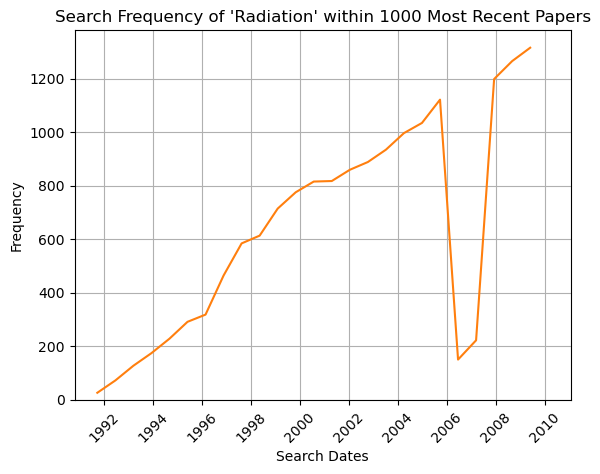

In [5]:
plt.title("Publish Frequency of 'Radiation' within 1000 Most Recent Papers")
plt.xlabel("Publish Dates")
plt.ylabel("Frequency")
plt.grid("True")
plt.xticks(rotation=45)
counts, bins, bars = plt.hist(dates, 25, alpha=0)
plt.plot(bins[:-1], counts)
plt.show()